In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Voting Classifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=.2, random_state=18) # carefully picked random state for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)), 
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
                         voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg', LogisticRegression(C=100)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=0))],
                 voting='soft')

In [3]:
voting.estimators_[0].score(X_test, y_test)

0.84

In [4]:
voting.estimators_[1].score(X_test, y_test)

0.8

In [5]:
voting.score(X_test, y_test)

0.88

# Random Forests

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [7]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

Text(0.5, 0, 'max_features')

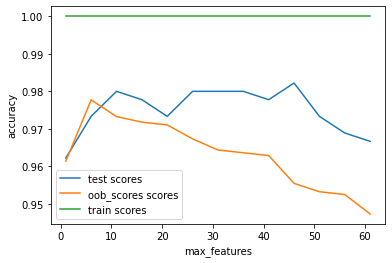

In [8]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features")

In [9]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [10]:
rf.score(X_test, y_test)

0.9688888888888889

In [11]:
np.set_printoptions(precision=6, suppress=True)
param_grid = {'max_features': [4,8,12,16,20],
              'max_depth': [6,8,10,12,14]}
param_grid

{'max_features': [4, 8, 12, 16, 20], 'max_depth': [6, 8, 10, 12, 14]}

In [12]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf, param_grid=param_grid, cv=10, return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'max_features': [4, 8, 12, 16, 20]},
             return_train_score=True)

In [13]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.252962,0.027001,0.014865,0.001754,6,4,"{'max_depth': 6, 'max_features': 4}",0.933333,0.970370,0.962963,...,0.985149,0.987624,0.989274,0.989274,0.988449,0.986810,0.987634,0.987634,0.987709,0.001352
1,0.314920,0.035909,0.014657,0.001405,6,8,"{'max_depth': 6, 'max_features': 8}",0.925926,0.977778,0.977778,...,0.988449,0.987624,0.990099,0.988449,0.990924,0.988458,0.987634,0.987634,0.988699,0.001381
2,0.331848,0.026541,0.013864,0.001636,6,12,"{'max_depth': 6, 'max_features': 12}",0.940741,0.985185,0.977778,...,0.985149,0.990924,0.987624,0.987624,0.985974,0.987634,0.990932,0.987634,0.988204,0.001847
3,0.358675,0.022055,0.012467,0.001496,6,16,"{'max_depth': 6, 'max_features': 16}",0.896296,0.977778,0.955556,...,0.981023,0.980198,0.985974,0.988449,0.981848,0.985161,0.989283,0.985161,0.984492,0.003107
4,0.416154,0.024238,0.013259,0.001726,6,20,"{'max_depth': 6, 'max_features': 20}",0.911111,0.970370,0.955556,...,0.984323,0.981848,0.981848,0.983498,0.985149,0.983512,0.984336,0.985985,0.983832,0.001779
5,0.276023,0.034418,0.014559,0.002891,8,4,"{'max_depth': 8, 'max_features': 4}",0.948148,0.970370,0.985185,...,0.998350,0.998350,1.000000,0.999175,0.998350,0.999176,0.999176,0.997527,0.998680,0.000660
6,0.347245,0.028807,0.015470,0.002201,8,8,"{'max_depth': 8, 'max_features': 8}",0.955556,0.985185,0.977778,...,1.000000,0.998350,0.999175,0.999175,1.000000,1.000000,1.000000,0.999176,0.999588,0.000553
7,0.341287,0.010009,0.012168,0.000598,8,12,"{'max_depth': 8, 'max_features': 12}",0.940741,0.977778,0.992593,...,0.998350,0.998350,0.998350,0.999175,0.997525,0.999176,0.999176,0.999176,0.998845,0.000660
8,0.392899,0.010695,0.012428,0.000837,8,16,"{'max_depth': 8, 'max_features': 16}",0.962963,0.985185,0.985185,...,0.999175,0.999175,1.000000,0.998350,0.999175,0.999176,1.000000,1.000000,0.999423,0.000528
9,0.448496,0.018929,0.012467,0.000804,8,20,"{'max_depth': 8, 'max_features': 20}",0.955556,0.985185,0.977778,...,0.999175,0.999175,1.000000,0.999175,0.999175,0.999176,1.000000,1.000000,0.999505,0.000404


In [14]:
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_max_depth', columns='param_max_features')
pd.set_option("display.precision",4)
res = res.set_index(res.index.values.round(4))

In [15]:
res

param_max_features,4,8,12,16,20
6,0.9540,0.9607,0.9592,0.9517,0.9458
8,0.9710,0.9696,0.9696,0.9718,0.9696
10,0.9733,0.9703,0.9725,0.9718,0.9718
12,0.9733,0.9740,0.9770,0.9748,0.9733
14,0.9740,0.9740,0.9785,0.9792,0.9718


<AxesSubplot:xlabel='param_max_features'>

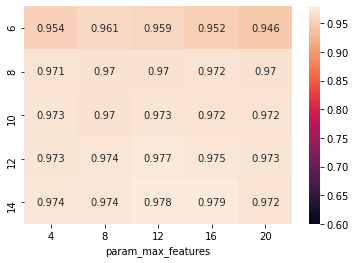

In [16]:
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [17]:
grid.best_params_

{'max_depth': 14, 'max_features': 16}

In [18]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=14, max_features=16)


In [19]:
accuracy = grid.score(X_test, y_test)
print('Accuracy score of the {} is {:.3f}'.format(grid.__class__.__name__, accuracy))

Accuracy score of the GridSearchCV is 0.978


# Grid-searching which model to use

In [20]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [21]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [22]:
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [4,8,12,16,20],
              'classifier__max_depth': [6,8,10,12,20]}]

In [23]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid=[{'classifier': [SVC(C=1, gamma=0.001)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'preprocessing': [StandardScaler(), None]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [6, 8, 10, 12, 20],
                          'classifier__max_features': [4, 8, 12, 16, 20],
                          'preprocessing': [None]}])

In [24]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Test-set score: {:.3f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=1, gamma=0.001), 'classifier__C': 1, 'classifier__gamma': 0.001, 'preprocessing': None}

Best cross-validation score: 0.988
Test-set score: 0.991


# Feature Importance

In [25]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [26]:
mnist.data.shape

(70000, 784)

In [27]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

The digit in the image is 5


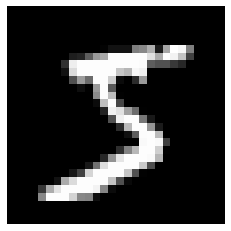

In [28]:
plt.imshow(mnist.data[0].reshape(28, 28), cmap='gray');
plt.axis('off')
print('The digit in the image is {}'.format(mnist.target[0]))

In [29]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [30]:
import matplotlib as mpl

In [31]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

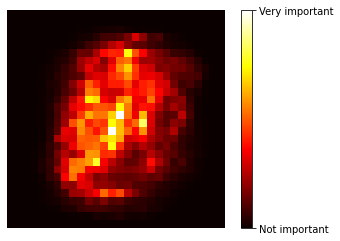

In [32]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()